# The goal of this project is perform sentiment analysis to IMDB movie reviews by using traditional machine learning methodologie such as logistic regression, random forest, svm and voting

In [1]:
import os
import pandas as pd

The raw data contains 50000 movie reviews text files, I will use 25000 files as training dataset. 

# Data preprocessing 

The 25000 training data have 12500 postive reveiws and 12500 negative reviews. I will combine them into a pandas dataframe, and label them as positve or negative 

First, combine 12500 postive review text files into a dataframe

In [2]:
file_names = os.listdir('/Users/angelali/Desktop/BrainStation/Capstone Project/aclImdb/train/pos')
# Create Dictionary for File Name and Text
file_name_and_text = {}
for file in file_names:
    with open('/Users/angelali/Desktop/BrainStation/Capstone Project/aclImdb/train/pos/' + file, "r") as target_file:
         file_name_and_text[file] = target_file.read()
file_data = (pd.DataFrame.from_dict(file_name_and_text, orient='index')
             .reset_index().rename(index = str, columns = {'index': 'file_name', 0: 'text'}))

In [3]:
file_data.head()

,file_name,text
0,0_9.txt,Bromwell High is a cartoon comedy. It ran at t...
1,10000_8.txt,Homelessness (or Houselessness as George Carli...
2,10001_10.txt,Brilliant over-acting by Lesley Ann Warren. Be...
3,10002_7.txt,This is easily the most underrated film inn th...
4,10003_8.txt,This is not the typical Mel Brooks film. It wa...


In [4]:
len(file_data)

12500

Preprosess the data by deleting the 'file_name' column

In [5]:
del file_data['file_name']

Take a look at one data sample

In [6]:
file_data['text'][1]

'Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once considered human who did everything from going to school, work, or vote for the matter. Most people think of the homeless as just a lost cause while worrying about things such as racism, the war on Iraq, pressuring kids to succeed, technology, the elections, inflation, or worrying if they\'ll be next to end up on the streets.<br /><br />But what if you were given a bet to live on the streets for a month without the luxuries you once had from a home, the entertainment sets, a bathroom, pictures on the wall, a computer, and everything you once treasure to see what it\'s like to be homeless? That is Goddard Bolt\'s lesson.<br /><br />Mel Brooks (who directs) who stars as Bolt plays a rich man who has everything in the world until deciding to make a bet with a sissy rival (Jeffery Tambor) to see if he can live in the streets for thirty days withou

Create a new column 'target' in order to label these data as positive 

In [7]:
file_data['target'] = 'pos'

In [8]:
file_data.head()

,text,target
0,Bromwell High is a cartoon comedy. It ran at t...,pos
1,Homelessness (or Houselessness as George Carli...,pos
2,Brilliant over-acting by Lesley Ann Warren. Be...,pos
3,This is easily the most underrated film inn th...,pos
4,This is not the typical Mel Brooks film. It wa...,pos


combine 12500 negative review text files into a dataframe

In [9]:
file_names2 = os.listdir('/Users/angelali/Desktop/BrainStation/Capstone Project/aclImdb/train/neg')
# Create Dictionary for File Name and Text
file_name_and_text2 = {}
for file in file_names2:
    with open('/Users/angelali/Desktop/BrainStation/Capstone Project/aclImdb/train/neg/' + file, "r") as target_file:
         file_name_and_text2[file] = target_file.read()
file_data2 = (pd.DataFrame.from_dict(file_name_and_text2, orient='index')
             .reset_index().rename(index = str, columns = {'index': 'file_name', 0: 'text'}))

In [10]:
len(file_data2)

12500

Preprosess the data by deleting the 'file_name' column

In [11]:
del file_data2['file_name']

Create a new column 'target' in order to label these data as negative

In [12]:
file_data2['target'] = 'neg'

combine postive and negative dataframes into a new dataframe as my training dataset

In [13]:
train_data = pd.concat([file_data, file_data2],axis=0,ignore_index= True)

In [14]:
train_data

,text,target
0,Bromwell High is a cartoon comedy. It ran at t...,pos
1,Homelessness (or Houselessness as George Carli...,pos
2,Brilliant over-acting by Lesley Ann Warren. Be...,pos
3,This is easily the most underrated film inn th...,pos
4,This is not the typical Mel Brooks film. It wa...,pos
5,"This isn't the comedic Robin Williams, nor is ...",pos
6,Yes its an art... to successfully make a slow ...,pos
7,"In this ""critically acclaimed psychological th...",pos
8,THE NIGHT LISTENER (2006) **1/2 Robin Williams...,pos
9,"You know, Robin Williams, God bless him, is co...",pos


Now, I am going to build my test dataframe

First, combine another 12500 postive review text files into a dataframe

In [15]:
file_names3 = os.listdir('/Users/angelali/Desktop/BrainStation/Capstone Project/aclImdb/test/pos')
# Create Dictionary for File Name and Text
file_name_and_text3 = {}
for file in file_names3:
    with open('/Users/angelali/Desktop/BrainStation/Capstone Project/aclImdb/test/pos/' + file, "r") as target_file:
         file_name_and_text3[file] = target_file.read()
file_data3 = (pd.DataFrame.from_dict(file_name_and_text3, orient='index')
             .reset_index().rename(index = str, columns = {'index': 'file_name', 0: 'text'}))

Delete the 'file name' column 

In [16]:
del file_data3['file_name']

Create a new column 'target' in order to label these data as positive

In [17]:
file_data3['target'] = 'pos'

In [18]:
file_data3.head()

,text,target
0,I went and saw this movie last night after bei...,pos
1,Actor turned director Bill Paxton follows up h...,pos
2,As a recreational golfer with some knowledge o...,pos
3,"I saw this film in a sneak preview, and it is ...",pos
4,Bill Paxton has taken the true story of the 19...,pos


Combine another 12500 negative review text files into a dataframe

In [19]:
file_names4 = os.listdir('/Users/angelali/Desktop/BrainStation/Capstone Project/aclImdb/test/neg')
# Create Dictionary for File Name and Text
file_name_and_text4 = {}
for file in file_names4:
    with open('/Users/angelali/Desktop/BrainStation/Capstone Project/aclImdb/test/neg/' + file, "r") as target_file:
         file_name_and_text4[file] = target_file.read()
file_data4 = (pd.DataFrame.from_dict(file_name_and_text4, orient='index')
             .reset_index().rename(index = str, columns = {'index': 'file_name', 0: 'text'}))

Delete the 'file name' column 

In [20]:
del file_data4['file_name']

Create a new column 'target' in order to label these data as negative

In [21]:
file_data4['target'] = 'neg'

In [22]:
file_data4.head()

,text,target
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures (movies is not a fitting word f...,neg


combine postive and negative dataframes into a new dataframe as my test dataset

In [23]:
test_data = pd.concat([file_data3, file_data4],axis=0,ignore_index= True)

In [24]:
test_data

,text,target
0,I went and saw this movie last night after bei...,pos
1,Actor turned director Bill Paxton follows up h...,pos
2,As a recreational golfer with some knowledge o...,pos
3,"I saw this film in a sneak preview, and it is ...",pos
4,Bill Paxton has taken the true story of the 19...,pos
5,"I saw this film on September 1st, 2005 in Indi...",pos
6,"Maybe I'm reading into this too much, but I wo...",pos
7,I felt this film did have many good qualities....,pos
8,This movie is amazing because the fact that th...,pos
9,"""Quitting"" may be as much about exiting a pre-...",pos


seperate the data into feature and target

In [25]:
feature = train_data['text']
target = train_data['target']
feature_test = test_data['text']
target_test = test_data['target']

# Tokenized the data

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import string
import nltk
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stemmer = nltk.stem.PorterStemmer()

build a function to preprosess the text data so that it can be tokenized later 

In [27]:
def my_tokenizer(sentence):

    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    for word in listofwords:
        # Remove stopwords
        if word in ENGLISH_STOP_WORDS: continue
        # Stem words
        stemmed_word = stemmer.stem(word)
        for punctuation_mark in string.punctuation:
            # Remove punctuation and set to lower case
            stemmed_word = stemmed_word.replace(punctuation_mark, '').lower()
        listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

# Use TF-IDF to vectorize the text data into vectors

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(min_df=5, tokenizer=my_tokenizer, ngram_range = (1,3)).fit(feature)

Transform the feature data into vector

In [30]:
x_train = vect.transform(feature)
x_test = vect.transform(feature_test)
y_train = target
y_test = target_test

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
import warnings
warnings.filterwarnings('ignore')

# Train a logistic regression model to classify the sentiment of the input text

In [33]:
#cross validation with 5 folds
logistic_model = LogisticRegression()
validation_score = cross_val_score(logistic_model, x_train, y_train, cv = 5)

# Apply K-Fold Cross Validation method to validate my model

In [34]:
validation_score

array([0.8612, 0.8506, 0.8568, 0.8548, 0.864 ])

Check the average validation score

In [35]:
import numpy as np

In [36]:
average_validation_score = np.mean(validation_score)
print('average_validation_score)

0.85748


score 85.748% is not bad, now we train the model and ues test dataset to check the model accuracy

In [137]:
logistic_model = LogisticRegression().fit(x_train, y_train)
log_train_accuracy = logistic_model.score(x_train, y_train)
log_test_accuracy = logistic_model.score(x_test, y_test)
print(log_train_accuracy)
print(log_test_accuracy)

0.94344
0.88036


I have train accuracy 94.344% and test accuracy 88.036% which is not bad

model accuracy is only one of many measurement for model performance, let's apply other method to measure the model performance

# Precision, Recall, F1-score

In [49]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

use my model to make prediction with input train data and test data

In [91]:
y_train_pred = logistic_model.predict(x_train)
y_test_pred = logistic_model.predict(x_test)

convert binary outcome from string 'pos', 'neg' to numerical value 1 and 0

In [98]:
y_train = y_train.replace('pos',1)
y_train = y_train.replace('neg',0)

In [105]:
y_test = y_test.replace('pos',1)
y_test = y_test.replace('neg',0)

In [100]:
y_train_pred = pd.Series(y_train_pred)
y_test_pred = pd.Series(y_test_pred)

In [102]:
y_train_pred = y_train_pred.replace('pos',1)
y_train_pred = y_train_pred.replace('neg',0)
y_test_pred = y_test_pred.replace('pos',1)
y_test_pred = y_test_pred.replace('neg',0)

In [114]:
print(f"Train Precision: {precision_score(y_train, y_train_pred)}")
print(f"Train Recall:{recall_score(y_train, y_train_pred)}")


print(f"Test Precision:{precision_score(y_test, y_test_pred)}")
print(f"Test Recall:{recall_score(y_test, y_test_pred)}")

print(f"Train F1: {f1_score(y_train, y_train_pred)}")
print(f"Test F1:{f1_score(y_test, y_test_pred)}")

Train Precision: 0.9359075180874489
Train Recall:0.95208
Test Precision:0.8780313270255228
Test Recall:0.88344
Train F1: 0.9439244923857869
Test F1:0.8807273597320253


# Now try another methodology: Random Forest model

In [115]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [116]:
estimators = [20,50,80,100,150,200,250,300]

try different number of estimators in order to find the hyperparameter

In [117]:
train_accuracy = []
test_accuracy = []

for estimators in estimators:
    # instantiate the model
    my_random_forest = RandomForestClassifier(n_estimators=estimators)
    # fit the model
    my_random_forest.fit(x_train, y_train)
    # accuracy score
    train_score = my_random_forest.score(x_train,y_train)
    test_score = my_random_forest.score(x_test,y_test)
    
    train_accuracy.append(train_score)
    test_accuracy.append(test_score)    

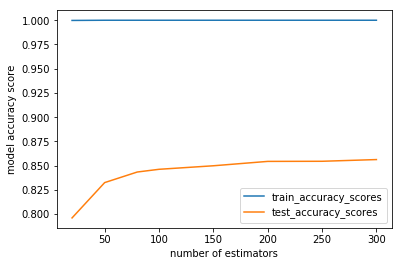

In [118]:
plt.plot([20,50,80,100,150,200,250,300],train_accuracy,label="train_accuracy_scores")
plt.plot([20,50,80,100,150,200,250,300],test_accuracy,label="test_accuracy_scores")
plt.ylabel('model accuracy score')
plt.xlabel('number of estimators')
plt.legend()
plt.show()

after the estimator is bigger than 250, the accuracy only increase very little, so 250 estimators is a ideal number

In [119]:
# instantiate the model
my_random_forest = RandomForestClassifier(n_estimators=250)
# fit the model
my_random_forest.fit(x_train, y_train)
# accuracy score
train_score = my_random_forest.score(x_train,y_train)
test_score = my_random_forest.score(x_test,y_test)

In [120]:
print('train accuracy',train_score)
print('test accuracy', test_score)

train accuracy 1.0
test accuracy 0.85296


use random forest model to make prediction 

In [122]:
y_train_pred = my_random_forest.predict(x_train)
y_test_pred = my_random_forest.predict(x_test)

In [125]:
print(f"Train Precision: {precision_score(y_train, y_train_pred)}")
print(f"Train Recall:{recall_score(y_train, y_train_pred)}")


print(f"Test Precision:{precision_score(y_test, y_test_pred)}")
print(f"Test Recall:{recall_score(y_test, y_test_pred)}")

print(f"Train F1: {f1_score(y_train, y_train_pred)}")
print(f"Test F1:{f1_score(y_test, y_test_pred)}")

Train Precision: 1.0
Train Recall:1.0
Test Precision:0.8588742476004555
Test Recall:0.84472
Train F1: 1.0
Test F1:0.8517383237880132


# Now, try Support Vector Machines

In [126]:
from sklearn.svm import SVC

In [127]:
my_kernel_SVM = SVC()
my_kernel_SVM.fit(x_train,y_train)
train_accuracy = my_kernel_SVM.score(x_train,y_train)
test_accuracy = my_kernel_SVM.score(x_test,y_test)

In [128]:
print('train accuracy',train_accuracy)
print('test accuracy', test_accuracy)

train accuracy 0.75864
test accuracy 0.75164


use svm to make prediction

In [129]:
y_train_pred = my_kernel_SVM.predict(x_train)
y_test_pred = my_kernel_SVM.predict(x_test)

In [130]:
print(f"Train Precision: {precision_score(y_train, y_train_pred)}")
print(f"Train Recall:{recall_score(y_train, y_train_pred)}")


print(f"Test Precision:{precision_score(y_test, y_test_pred)}")
print(f"Test Recall:{recall_score(y_test, y_test_pred)}")

print(f"Train F1: {f1_score(y_train, y_train_pred)}")
print(f"Test F1:{f1_score(y_test, y_test_pred)}")

Train Precision: 0.6843005358568008
Train Recall:0.96032
Test Precision:0.6807031653932326
Test Recall:0.94792
Train F1: 0.7991478596631382
Test F1:0.7923897415320827


# Now, try VotingClassifier ensembling with logistic model,random_forest and SVM model

In [131]:
from sklearn.ensemble import VotingClassifier

In [134]:
ensemble = VotingClassifier(estimators=[('logisic model', logistic_model),\
                                        ('random_forest', my_random_forest),\
                                        ('SVM Model', my_kernel_SVM)],\
                                        voting="hard",\
                                        weights = [1,1,1])

In [135]:
ensemble.fit(x_train,y_train)

VotingClassifier(estimators=[('logisic model', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('ra...f', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard',
         weights=[1, 1, 1])

In [136]:
ensemble_accuracy = ensemble.score(x_test, y_test)

In [139]:
print(ensemble_accuracy)

0.86704


In [141]:
logistic_accuracy = log_test_accuracy
Random_forest_accuracy = test_score
svm_accuracy = test_accuracy

In [143]:
accuracy = [ensemble_accuracy, logistic_accuracy, Random_forest_accuracy,svm_accuracy]

In [144]:
accuracy

[0.86704, 0.88036, 0.85296, 0.75164]

In [148]:
models = ['ensemble', 'logistic', 'Random_forest', 'SVM']

Text(0.5, 1.0, 'Compare model accuracy among voting, logistic model, random_forest and SVM Model')

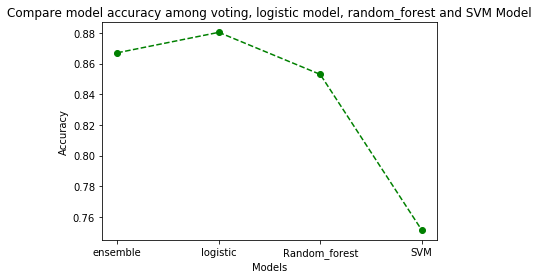

In [149]:
plt.plot(models,accuracy,color='green', marker='o', linestyle='dashed')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Compare model accuracy among voting, logistic model, random_forest and SVM Model')

as we can see above, the logistic regression has highest accuracy which is 0.88036

save my logistic model

In [151]:
from sklearn.externals import joblib

In [152]:
filename = 'logistic_model.sav'
joblib.dump(logistic_model, filename)

['logistic_model.sav']

In [153]:
loaded_model = joblib.load(filename)
result = loaded_model.score(x_test, y_test)
print(result)

0.88036
